# Plots for Paper

In [60]:
from ipynb.fs.full.Mimic import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from scipy.stats import norm
colormap = np.array(["#66ccee", "#ccbb44", "#ee6677", "#aa3377", "#4477aa", "#228833", "#bbbbbb"])

import matplotlib
sns.set_theme()
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
from matplotlib.legend_handler import HandlerTuple
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

import matplotlib.ticker as mtick
import pickle

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

# Histogram Bin Selection

In [2]:
with open('Results/number_of_bins.pickle', 'rb') as f:
    res = pickle.load(f)

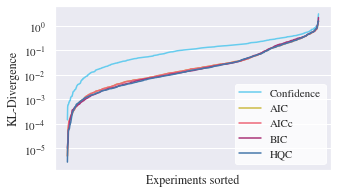

In [14]:
fig = plt.figure(figsize=(4.95, 3))
for i in range(5):
    plt.plot(range(1000), sorted(res[:,i]), c=colormap[i])

plt.legend(["Confidence", "AIC", "AICc", "BIC", "HQC"], facecolor='white', edgecolor='white')
plt.xlabel('Experiments sorted')
plt.ylabel('KL-Divergence')
plt.xticks([])
plt.yscale('log')
plt.show()

In [15]:
# for f in ["svg", "png", 'pdf']:
#     fig.savefig("Plots/Exp_number_of_bins."+f, bbox_inches='tight', dpi=300)

# Spread

In [61]:
df = pd.read_csv("Results/exp_predictionAcc_spread.txt", sep=',', header=0)
df["Improvement"] = ((df["augmented_acc"] - df["biased"]) / (df["optimal"] - df["biased"])).astype(float)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df['Method'] = df['method']
df['Classifier'] = df['clf']
df['Spread'] = df['spread']
df['Method'] = df['Method'].replace('GMM', 'GMMimic')

In [62]:
df

,seed,num_clusters,num_dims,spread,clf,optimal,biased,method,augmented_acc,added_points,Improvement,Method,Classifier,Spread
0,5734,1,2,10,DT,0.673333,0.520000,GMM,0.517333,292,-0.017391,GMMimic,DT,10
1,5734,1,2,10,DT,0.673333,0.520000,Imitate,0.673333,763,1.000000,Imitate,DT,10
2,5734,1,2,10,DT,0.673333,0.520000,Mimic (ours),0.504000,406,-0.104348,Mimic (ours),DT,10
3,5734,1,2,10,SVM,0.745333,0.524667,GMM,0.520667,292,-0.018127,GMMimic,SVM,10
4,5734,1,2,10,SVM,0.745333,0.524667,Imitate,0.648667,763,0.561934,Imitate,SVM,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,7288,5,2,200,SVM,0.968667,0.960667,Imitate,0.854000,932,-13.333333,Imitate,SVM,200
6575,7288,5,2,200,SVM,0.968667,0.960667,Mimic (ours),0.960667,271,0.000000,Mimic (ours),SVM,200
6576,7288,5,2,200,RF,0.994000,0.942000,GMM,0.956000,283,0.269231,GMMimic,RF,200
6577,7288,5,2,200,RF,0.994000,0.942000,Imitate,0.840000,932,-1.961538,Imitate,RF,200


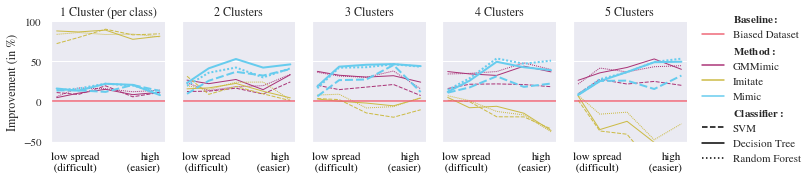

In [63]:
sns.set_style("whitegrid", {'xtick.color': 'darkgray', 'xtick.direction': 'out', 'xtick.bottom': True, 'xtick.top': False});
sns.set_theme()
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#sns.set(rc={'figure.figsize':(10.5, 3)})
#plt.figure(figsize=(10.5, 3))

graph = sns.relplot(
    x="spread", y="Improvement", data=df, hue="Method", col='num_clusters', style="Classifier",
    kind="line", estimator='median', ci=None, linewidth=1,
    palette={'Imitate': colormap[1], 'Mimic (ours)': colormap[0], 'GMMimic': colormap[3]},
    legend=None, height=2.5, aspect=10.5/2.5/5.5)

graph.set(xlabel=None)
graph.set_ylabels('Improvement (in %)')
gs = graph.axes[0]

for i, g in enumerate(gs):
    g.axhline(0, label="baseline", c=colormap[2])
    g.set_title(str(i+1) + ' Cluster' + ('s' if i>0 else ' (per class)'))#, fontsize=13)

lw_mimic = 2
for g in graph.axes[0]:
    plt.setp(g.lines[6], linewidth=lw_mimic)
    plt.setp(g.lines[7], linewidth=lw_mimic)
    plt.setp(g.lines[8], linewidth=lw_mimic)
    g.xaxis.grid(False)
    g.set_xticks([0,200])
    g.xaxis.label.set_color('black')
    labels = g.set_xticklabels(['low spread\n (difficult)','high\n (easier)'])
    labels[0].set_ha('left')
    labels[0].set_color('black')
    labels[1].set_ha('right')
    labels[1].set_color('black')
    g.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0, symbol=None))
    

    lw=1.5
    legend_elements = [Line2D([0], [0], color='white', lw=lw, label=r'$\bf{Baseline:}$'),
                      Line2D([1], [1], color=colormap[2], lw=lw, label='Biased Dataset'),
                      Line2D([0], [0], color='white', lw=lw, label=r'$\bf{Method:}$'),
                      Line2D([0], [0], color=colormap[3], lw=lw, label='GMMimic'),
                      Line2D([0], [0], color=colormap[1], lw=lw, label='Imitate'),
                      Line2D([0], [0], color=colormap[0], lw=lw, label='Mimic'),
                       Line2D([0], [0], color='white', lw=lw, label=r'$\bf{Classifier:}$'),
                      Line2D([0], [0], color='black', linestyle='dashed', lw=lw, label='SVM'),
                      Line2D([0], [5], color='black', lw=lw, label='Decision Tree'),
                      Line2D([0], [0], color='black', linestyle='dotted', lw=lw, label='Random Forest')]
    graph.axes[0][4].legend(handles=legend_elements, loc='upper left', ncol=1, frameon=False, 
                            bbox_to_anchor=(1.05, 1.15))#, fontsize=11)
    
plt.ylim(-0.5, 1)
plt.show()

In [64]:
# for f in ["svg", "png", 'pdf', 'eps']:
#     graph.savefig("Plots/Exp_acc_spread."+f, bbox_inches='tight', dpi=300)

### Full plots:

(-0.5, 1.0)

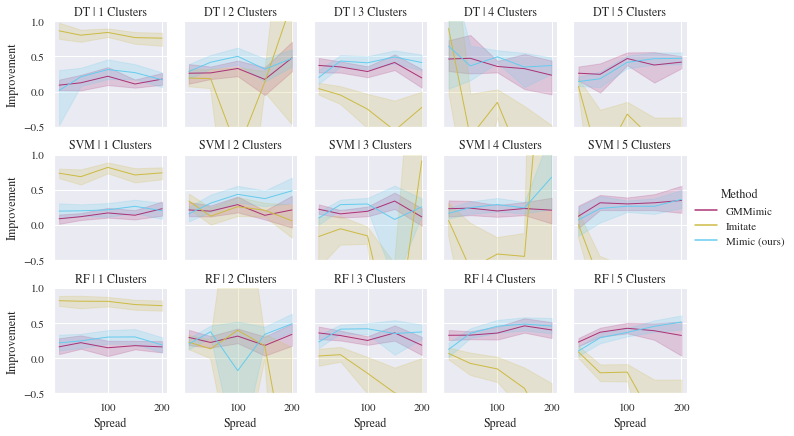

In [65]:
sns.set_theme()
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

graph = sns.relplot(
    x="Spread", y="Improvement", data=df, hue="Method", col='num_clusters', row="Classifier",
    kind="line", estimator='mean', ci=95, linewidth=1,
    palette={'Imitate': colormap[1], 'Mimic (ours)': colormap[0], 'GMMimic': colormap[3]},
    height=2, aspect=10.5/2/5.5)

# graph.set(xticklabels=[])

graph.set_titles(row_template = '{row_name}', col_template = '{col_name} Clusters')
#graph.legend(loc=2, bbox_to_anchor=(1.05, 1.15))#, fontsize=11)
#plt.tight_layout()
plt.ylim(-0.5, 1)

In [66]:
# for f in ["svg", "png", 'pdf']:
#     graph.savefig("Plots/Exp_acc_spread_extended."+f, bbox_inches='tight', dpi=300)

# Real Data

In [67]:
df = pd.read_csv('Results/exp_predictionAcc_realData.txt', header=0, sep=',')
DS = ['Wholesale', 'Vertebral Column', 'Banknote', 'Diabetes', 'Skin']
df['DS'] = pd.Categorical(df['DS'], categories=DS, ordered=True)
CLF = ['DT', 'RF', 'SVM']
df['clf'] = pd.Categorical(df['clf'], categories=CLF, ordered=True)
df['opt_mean'] = df.groupby(['DS', 'clf'])['optimal'].transform('mean')
df['b_mean'] = df.groupby(['DS', 'clf'])['biased'].transform('mean')
#df["Improvement"] = ((df["augmented_acc"] - df["biased"]) / (df["optimal"] - df["biased"])).astype(float)
df["Improvement"] = ((df["augmented_acc"] - df["b_mean"]) / (df["opt_mean"] - df["b_mean"])).astype(float)
df['Improvement'] = np.where(df.opt_mean < df.b_mean, df["augmented_acc"] - df["b_mean"], df['Improvement'])
#df["Improvement"] = (df["augmented_acc"] - df["b_mean"]).astype(float)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df = df[df.DS != 'Shuttle']
df = df[df.DS != 'Yeast']
df = df[df.DS != 'Abalone']
df = df[df.DS != 'Car']
df = df.sort_values(by=['DS', 'clf'])
df['method'] = df['method'].replace('GMM', 'GMMimic')
df

,DS,rep,clf,optimal,biased,method,augmented_acc,added_points,opt_mean,b_mean,Improvement
0,Wholesale,0,DT,0.488636,0.545455,GMMimic,0.556818,0,0.521591,0.440909,1.436620
1,Wholesale,0,DT,0.488636,0.545455,Imitate,0.545455,155,0.521591,0.440909,1.295775
2,Wholesale,0,DT,0.488636,0.545455,Mimic (ours),0.420455,26,0.521591,0.440909,-0.253521
9,Wholesale,1,DT,0.590909,0.465909,GMMimic,0.488636,0,0.521591,0.440909,0.591549
10,Wholesale,1,DT,0.590909,0.465909,Imitate,0.636364,167,0.521591,0.440909,2.422535
...,...,...,...,...,...,...,...,...,...,...,...
886,Skin,8,SVM,0.948012,0.829766,Imitate,0.826707,2473,0.952497,0.842508,-0.143652
887,Skin,8,SVM,0.948012,0.829766,Mimic (ours),0.832824,1387,0.952497,0.842508,-0.088044
894,Skin,9,SVM,0.946993,0.851172,GMMimic,0.851172,21,0.952497,0.842508,0.078777
895,Skin,9,SVM,0.946993,0.851172,Imitate,0.852192,2504,0.952497,0.842508,0.088044


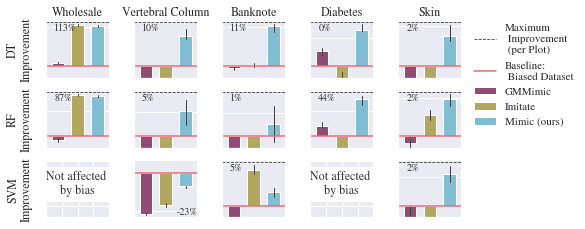

In [68]:
sns.set_theme()
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
graph = sns.catplot(x="method", y="Improvement", data=df, hue="method", col='DS', row='clf',
                    kind="bar", sharey=False, saturation=0.6, ci=9, errwidth=1, #col_wrap=4, 
                    height=1.1, aspect=8/1.1/6,
                    palette={'Imitate': colormap[1], 'Mimic (ours)': colormap[0], 'GMMimic': colormap[3]},
                   legend=None)

graph.set(yticklabels=[])  # remove the tick labels
graph.set(xticklabels=[])
graph.set(ylabel=None)
graph.set(xlabel=None)
graph.set(title=None)
for i, r in enumerate(graph.axes):
    for j, ax in enumerate(r):
        if i == 0: ax.set(title=DS[j])  # add a title
        if j==0: ax.set(ylabel=CLF[i]+'\nImprovement')
            
        if CLF[i] == 'SVM' and DS[j] == 'Vertebral Column':
            b = ax.viewLim.get_points()[0][1]
            ax.set_ylim(bottom=b, top=-b/4.0)
            ax.set_xlim(left=-1, right=3)
            ax.text(1.7, 0.87*b, "{:1.0f}%".format(99*b), fontsize=10, va='center', ha='left', bbox=dict(alpha=0), c='#333333')
            ax.axhline(0.98*b, c='#333333', ls='--', linewidth=0.8, label='Maximum\n Improvement\n (per Plot)')
        else: 
            t = ax.viewLim.get_points()[1][1]
            ax.set_ylim(bottom=-ax.viewLim.get_points()[1][1]/4.0, top=t)
            ax.set_xlim(left=-1, right=3)
            if CLF[i] == 'SVM' and DS[j] in ['Wholesale', 'Diabetes']:
                ax.text(1, 0.5*t, "Not affected \nby bias", fontsize=12, clip_on=True, va='center', ha='center', 
                        bbox=dict(facecolor='w'), c='#333333')
                continue
            if False: #CLF[i] == 'SVM' and DS[j] == 'Yeast' or CLF[i] == 'DT' and DS[j] == 'Diabetes':
                ax.text(-0.5, 0.87*t, "+{:1.2f} Acc.".format(t), fontsize=10, va='center', ha='left', 
                        bbox=dict(alpha=0), c='#333333', clip_on=True)
                ax.axhline(0.99*t, c='#333333', ls='--', linewidth=0.8, label='Maximum\n Improvement\n (per Plot)')
            else:
                ax.text(-0.5, 0.87*t, "{:1.0f}%".format(99*t), fontsize=10, va='center', ha='left', bbox=dict(alpha=0), c='#333333')
                ax.axhline(0.99*t, c='#333333', ls='--', linewidth=0.8, label='Maximum\n Improvement\n (per Plot)')
        ax.axhline(0, label="Baseline:\n Biased Dataset", c=colormap[2])
        for patch in ax.patches :
            old_width = patch.get_width()
            patch.set_width(0.8)
            patch.set_x(patch.get_x() + (old_width - 0.8) * .5)
plt.tight_layout()
#graph.axes[2][2].legend(loc='lower center', ncol=5, bbox_to_anchor=(1.1, -0.5), frameon=False)#, fontsize=14)
graph.axes[0][-1].legend(loc='upper left', ncol=1, frameon=False, bbox_to_anchor=(1.05, 1.15))
plt.show()

In [69]:
# for f in ["svg", "png", 'pdf']:
#     graph.savefig("Plots/Exp_acc_realData."+f, bbox_inches='tight', dpi=300)

# Dimensions

In [70]:
df = pd.read_csv("Results/exp_predictionAcc_dims.txt", sep=',', header=0)
df["Improvement"] = ((df["augmented_acc"] - df["biased"]) / (df["optimal"] - df["biased"])).astype(float)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
CLF = ['DT', 'SVM', 'RF']
df['method'] = df['method'].replace('GMM', 'GMMimic')
df

,seed,num_clusters,num_dims,spread,clf,optimal,biased,method,augmented_acc,added_points,Improvement
0,8217,1,2,100,DT,0.981333,0.842000,GMMimic,0.847333,214,0.038278
1,8217,1,2,100,DT,0.981333,0.842000,Imitate,0.970000,500,0.918660
2,8217,1,2,100,DT,0.981333,0.842000,Mimic (ours),0.872667,420,0.220096
3,8217,1,2,100,SVM,0.956667,0.845333,GMMimic,0.852667,214,0.065868
4,8217,1,2,100,SVM,0.956667,0.845333,Imitate,0.923333,500,0.700599
...,...,...,...,...,...,...,...,...,...,...,...
4756,7977,5,5,100,SVM,0.916000,0.804000,Imitate,0.788667,1603,-0.136905
4757,7977,5,5,100,SVM,0.916000,0.804000,Mimic (ours),0.838667,385,0.309524
4758,7977,5,5,100,RF,0.953333,0.811333,GMMimic,0.872000,418,0.427230
4759,7977,5,5,100,RF,0.953333,0.811333,Imitate,0.822000,1603,0.075117


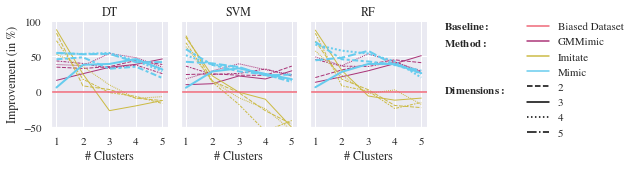

In [71]:
sns.set_style("whitegrid", {'xtick.color': 'darkgray', 'xtick.direction': 'out', 'xtick.bottom': True, 'xtick.top': False});
sns.set_theme()
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

graph = sns.relplot(x="num_clusters", y="Improvement", data=df, hue="method", col='clf', style="num_dims",
                    kind="line", estimator='median', ci=None, linewidth=1,
                    palette={'Imitate': colormap[1], 'Mimic (ours)': colormap[0], 'GMMimic': colormap[3]},
                   legend=None, height=2.3, aspect=8/2.3/4)
gs = graph.axes[0]
graph.set_xlabels('# Clusters')
graph.set_ylabels('Improvement (in %)')
for g in gs:
    g.axhline(0, label="baseline", c=colormap[2])
    g.set_xticks([1,2,3,4,5])
    g.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0, symbol=None))
    plt.setp(g.lines[8], linewidth=2)
    plt.setp(g.lines[9], linewidth=2)
    plt.setp(g.lines[10], linewidth=2)
    plt.setp(g.lines[11], linewidth=2)
graph.set_titles(col_template = '{col_name}')
    

lw=1.5
legend_elements = [Line2D([0], [0], color='white', lw=lw, label=r'$\bf{Baseline:}$', alpha=0),
                   Line2D([0], [0], color='white', lw=lw, label=r'$\bf{Method:}$', alpha=0),
                   Line2D([0], [0], color='white', lw=lw, label='', alpha=0),
                   Line2D([0], [0], color='white', lw=lw, label='', alpha=0),
                   Line2D([0], [0], color='white', lw=lw, label=r'$\bf{Dimensions:}$', alpha=0),
                   Line2D([0], [0], color='white', lw=lw, label='', alpha=0),
                   Line2D([0], [0], color='white', lw=lw, label='', alpha=0),
                   Line2D([0], [0], color='white', lw=lw, label='', alpha=0),
                   
                   Line2D([1], [1], color=colormap[2], lw=lw, label='Biased Dataset'),
                   Line2D([0], [0], color=colormap[3], lw=lw, label='GMMimic'),
                   Line2D([0], [0], color=colormap[1], lw=lw, label='Imitate'),
                   Line2D([0], [0], color=colormap[0], lw=lw, label='Mimic'),
                   Line2D([0], [0], color='black', linestyle='dashed', lw=lw, label='2'),
                   Line2D([0], [5], color='black', lw=lw, label='3'),
                   Line2D([0], [0], color='black', linestyle='dotted', lw=lw, label='4'),
                   Line2D([0], [0], color='black', linestyle='dashdot', lw=lw, label='5')]
graph.axes[0][2].legend(handles=legend_elements, loc='upper left', ncol=2, frameon=False, 
                        bbox_to_anchor=(0.8, 1.1))#, fontsize=11)
    
plt.ylim(-0.5, 1)
plt.show()

In [72]:
# for f in ["svg", "png", 'pdf']:
#     graph.savefig("Plots/Exp_acc_dimensions."+f, bbox_inches='tight', dpi=300)

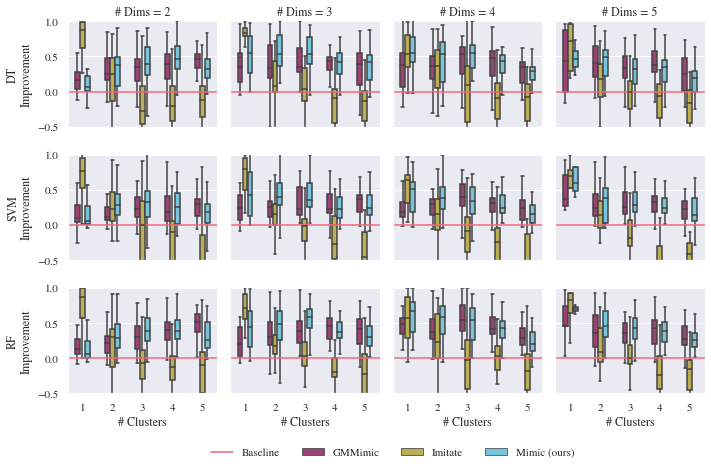

In [73]:
sns.set_theme()
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

graph = sns.catplot(x="num_clusters", y="Improvement", data=df, hue="method", row='clf', col="num_dims",
                    kind='box', fliersize=0,
                    palette={'Imitate': colormap[1], 'Mimic (ours)': colormap[0], 'GMMimic': colormap[3]},
                    width=0.5, height=2, aspect=9.6/2/4, legend=None)
graph.set_xlabels("# Clusters")
for i, gs in enumerate(graph.axes):
    for j, g in enumerate(gs):
        g.axhline(0, label="Baseline", c=colormap[2])
        if i==0: g.set_title("# Dims = "+str(j+2))
        if i>0: g.set_title("")
        
graph.axes[2][2].legend(loc='lower center', ncol=4, bbox_to_anchor=(0, -0.7), frameon=False)
plt.setp(graph.axes[0, 0], ylabel=CLF[0]+'\nImprovement')
plt.setp(graph.axes[1, 0], ylabel=CLF[1]+'\nImprovement')
plt.setp(graph.axes[2, 0], ylabel=CLF[2]+'\nImprovement')
plt.ylim(-0.5, 1)
plt.show()

In [74]:
# for f in ["svg", "png", 'pdf']:
#     graph.savefig("Plots/Exp_acc_dimensions_full."+f, bbox_inches='tight', dpi=300)

# No Bias

In [67]:
df = pd.read_csv("Results/exp_noBias.txt", header=0)
df['num_aug'] = df['num_aug'].astype(float)
df['num_aug_norm'] = df['num_aug'] / ((2 - df['biased'].astype(int))*2500)
df

,num_clusters,seed,biased,withPurge,num_aug,num_aug_norm
0,2,9602,False,False,186.0,0.0372
1,2,9602,False,True,0.0,0.0000
2,2,9602,True,False,850.0,0.3400
3,2,9602,True,True,367.0,0.1468
4,2,4548,False,False,372.0,0.0744
...,...,...,...,...,...,...
155,5,2613,True,True,459.0,0.1836
156,5,1114,False,False,1831.0,0.3662
157,5,1114,False,True,713.0,0.1426
158,5,1114,True,False,897.0,0.3588


<Figure size 302.4x180 with 0 Axes>

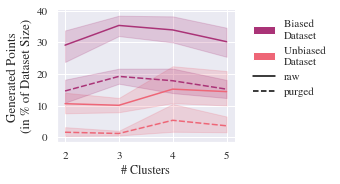

In [73]:
fig = plt.figure(figsize=(10.5*0.4, 2.5))

graph = sns.relplot(x="num_clusters", y="num_aug_norm", data=df, hue="biased", style="withPurge", kind="line", 
                    estimator='mean', ci=95, palette={False: colormap[2], True: colormap[3]},
                    height=2.5, aspect=10.5*0.3/2.5, legend=None)

graph.set_xlabels('# Clusters')
graph.axes[0][0].set_xticks([2, 3, 4, 5])
graph.set_ylabels('Generated Points \n(in % of Dataset Size)', fontsize=13)
graph.axes[0][0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0, symbol=None))

legend_elements = [Patch(facecolor=colormap[3], edgecolor=None, label='Biased \nDataset'),
                   Patch(facecolor=colormap[2], edgecolor=None, label='Unbiased \nDataset'),
                   Line2D([0], [0], color='black', lw=1.5, label='raw'),
                   Line2D([0], [0], color='black', lw=1.5, linestyle='dashed', label='purged')]
graph.axes[0][0].legend(handles=legend_elements, ncol=1, loc='upper left', bbox_to_anchor=(1.05, 1),
                       frameon=False)
plt.show()

In [74]:
# for f in ["svg", "png", 'pdf']:
#     graph.savefig("Plots/Exp_noBias."+f, bbox_inches='tight', dpi=300)

# Motivational Example

In [81]:
# Dataset
cov = [[1,-0.8], [-0.8,1]]      
u = 1.7
means = np.array([[u, -u], [0, 2*u], [3*u, u], [2*u, 4*u]])
data = np.empty((0,2))
labels = []
for i in range(len(means)):
    data = np.concatenate((data, np.random.multivariate_normal(means[i], cov, size=1000)), axis=0)
    labels = np.append(labels, [i]*1000).astype(int)
isInB = np.where(np.abs(data[:,0]-data[:,1]) > 2.5)[0]
deleted = np.setdiff1d(range(len(data)), isInB)
# data[:,0] = data[:,0]*1.25 # square
data[:,0] = data[:,0]*1.5
data_b, labels_b = data[isInB], labels[isInB]

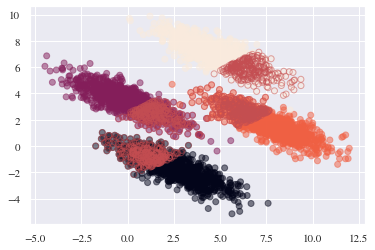

In [82]:
#plt.figure(figsize=(4, 4))
plotBias(data, labels, deleted)

In [83]:
def augment_multiClass(data, labels):
    points = []
    point_labels = []
    for c in np.unique(labels):
        aug_p, _ = Mimic_augment(data[labels==c], np.array([0]*np.sum(labels==c)))
        points.append(aug_p)
        point_labels.append([c]*len(aug_p))
    return np.concatenate(points), np.concatenate(point_labels)

In [87]:
data_imi = None
labels_imi = None
best_score = 0
for i in range(20):
    p, l = augment_multiClass(data_b, labels_b)
    d_i = np.concatenate((data_b, p))
    l_i = np.append(labels_b, l)
    score = SVC().fit(d_i, l_i).score(data, labels)
    if score > best_score:
        best_score = score
        data_imi = copy.deepcopy(d_i)
        labels_imi = copy.deepcopy(l_i)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA 

In [139]:
def plotBoundary(x_full, y_full, x_bias, y_bias, x_imi, y_imi, deleted):
    sets = [[x_full, y_full], [x_bias, y_bias], [x_imi, y_imi]]
    titles = ['Ground-Truth Sample', 'Biased Sample', 'Mimic (ours)\nAugmented Sample']

    # set main parameters 
    max_dot_size = 5 # modifier to scale the probability dots
    datapoint_size = 15 # size of the true labels

    clf = SVC(probability=True)

    x0_min, x0_max, x1_min, x1_max = x_full[:,0].min(), x_full[:,0].max(), x_full[:,1].min(), x_full[:,1].max()
    H = min(x1_max - x1_min, x0_max - x0_min) / 40.0 # mesh stepsize
    x0_axis_range = np.arange(x0_min, x0_max, H)
    x1_axis_range = np.arange(x1_min, x1_max, H)
    xx0, xx1 = np.meshgrid(x0_axis_range, x1_axis_range)
    xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))
    ratio = (x1_max - x1_min) / (x0_max - x0_min)

    # make figure
    plt.style.use('seaborn-whitegrid')
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8,8/4*ratio), dpi=300)#, constrained_layout=True)
    #plt.subplots_adjust(right=0.3)
    #plt.subplot_tool()
    colormap = np.array(["#66ccee", "#ccbb44", "#ee6677", "#aa3377", "#bbbbbb", "#4477aa", "#228833"])
    linestyles = ['dashed', 'dotted', 'solid']
    
    for i in range(3):
        x, y = sets[i]
        clf.fit(x, y)
        dot_prob = clf.predict_proba(xx)
        dot0 = np.where(np.argmax(dot_prob, axis=1) == 0)[0]
        dot1 = np.where(np.argmax(dot_prob, axis=1) == 1)[0]
        dot_col = np.argmax(dot_prob, axis=1)
        dot_size = np.max(dot_prob, axis=1)
        if i==0: dot_col0 = copy.deepcopy(dot_col)
        if i==1: dot_col1 = copy.deepcopy(dot_col)

        # plot all the little dots
#         ax[i].scatter(xx[dot0,0], xx[dot0,1], c='silver', alpha=0.4, s=max_dot_size*dot_size[dot0]**3, 
#                       linewidths=0, marker='o')
#         ax[i].scatter(xx[dot1,0], xx[dot1,1], c='gainsboro', alpha=0.4, s=max_dot_size*dot_size[dot1]**3, 
#                       linewidths=0, marker='^')

        # plot the contours
        ax[i].contour(x0_axis_range, x1_axis_range, np.reshape(dot_col,(xx0.shape[0],-1)), levels=0, 
                      linewidths=3, colors=colormap[i], zorder=4, linestyles=linestyles[i]) # decision boundary here
        ax[i].contour(x0_axis_range, x1_axis_range, np.reshape(dot_col0,(xx0.shape[0],-1)), levels=0, 
                      linewidths=2, colors=colormap[0], zorder=3, linestyles=linestyles[0]) # ground-truth boundary

        # plot the original x values.
        if i==2:
            isAug = np.append([False]*len(y_bias), [True]*(len(y_imi) - len(y_bias)))
            ax[i].scatter(x_bias[y_bias==0,0], x_bias[y_bias==0,1], c='silver', s=datapoint_size, zorder=2, 
                          linewidths=0, edgecolor='k', marker='o') # training data
            ax[i].scatter(x_bias[y_bias==1,0], x_bias[y_bias==1,1], c='gainsboro', s=datapoint_size, zorder=2, 
                          linewidths=0, edgecolor='k', marker='^') # training data
            
            ax[i].scatter(x[isAug][:,0], x[isAug][:,1], c=colormap[y[isAug]], s=datapoint_size, zorder=2, linewidths=0.1, 
                          edgecolor=colormap[3], marker='^') # augmented
            
            ax[i].scatter(x[isAug][y[isAug]==0,0], x[isAug][y[isAug]==0,1], c='silver', s=datapoint_size, zorder=2, 
                          linewidths=0.3, edgecolor=colormap[2], marker='o') # augmented
            ax[i].scatter(x[isAug][y[isAug]==1,0], x[isAug][y[isAug]==1,1], c='gainsboro', s=datapoint_size, zorder=2, 
                          linewidths=0.3, edgecolor=colormap[2], marker='^') # augmented
            
            ax[i].contour(x0_axis_range, x1_axis_range, np.reshape(dot_col1,(xx0.shape[0],-1)), levels=0, 
                          linewidths=2, colors=colormap[1], zorder=3, linestyles=linestyles[1]) # ground-truth boundary
        else:
            ax[i].scatter(x[y==0,0], x[y==0,1], c='silver', s=datapoint_size, zorder=2, linewidths=0, 
                          edgecolor='k', marker='o') # training data
            ax[i].scatter(x[y==1,0], x[y==1,1], c='gainsboro', s=datapoint_size, zorder=2, linewidths=0, 
                          edgecolor='k', marker='^') # training data

        ax[i].grid(False)
        ax[i].set_aspect(1)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(titles[i])#, fontsize='xx-large')
        
    handles = [Line2D([0], [0], color=colormap[0], lw=1),
               Line2D([0], [0], color=colormap[1], lw=1),
               Line2D([0], [0], color=colormap[2], lw=1),
               (Line2D([0], [0], marker='o', color='w', markerfacecolor='w', markersize=5, 
                     markeredgecolor=colormap[2]),
               Line2D([0], [0], marker='^', color='w', markerfacecolor='w', markersize=5, 
                     markeredgecolor=colormap[2]))]
#     ax[1].legend(handles, [r'$\mathrm{True \ decision \ boundary}$', r'$\mathrm{Biased \ decision \ boundary}$', 
#                            r'$\mathrm{Mimic \ decision \ boundary}$', r'$\mathrm{Augmented \ data}$'], 
#                  bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, 
#                  handler_map={tuple: HandlerTuple(ndivide=None)})#, fontsize='x-large')
    ax[2].legend(handles, 
                 ['True\n decision boundary', 'Biased\n decision boundary', 'Mimic\n decision boundary', 'Augmented data'],
                 ncol=1, loc='upper left', bbox_to_anchor=(1.1, 1.1), frameon=False,
                 handler_map={tuple: HandlerTuple(ndivide=None)})
    plt.show()
    return fig

<ipython-input-139-b4f62fdf55a3>:47: UserWarning: No contour levels were found within the data range.
  ax[i].contour(x0_axis_range, x1_axis_range, np.reshape(dot_col,(xx0.shape[0],-1)), levels=0,
<ipython-input-139-b4f62fdf55a3>:49: UserWarning: No contour levels were found within the data range.
  ax[i].contour(x0_axis_range, x1_axis_range, np.reshape(dot_col0,(xx0.shape[0],-1)), levels=0,
<ipython-input-139-b4f62fdf55a3>:47: UserWarning: No contour levels were found within the data range.
  ax[i].contour(x0_axis_range, x1_axis_range, np.reshape(dot_col,(xx0.shape[0],-1)), levels=0,
<ipython-input-139-b4f62fdf55a3>:49: UserWarning: No contour levels were found within the data range.
  ax[i].contour(x0_axis_range, x1_axis_range, np.reshape(dot_col0,(xx0.shape[0],-1)), levels=0,
<ipython-input-139-b4f62fdf55a3>:47: UserWarning: No contour levels were found within the data range.
  ax[i].contour(x0_axis_range, x1_axis_range, np.reshape(dot_col,(xx0.shape[0],-1)), levels=0,
<ipython-inpu

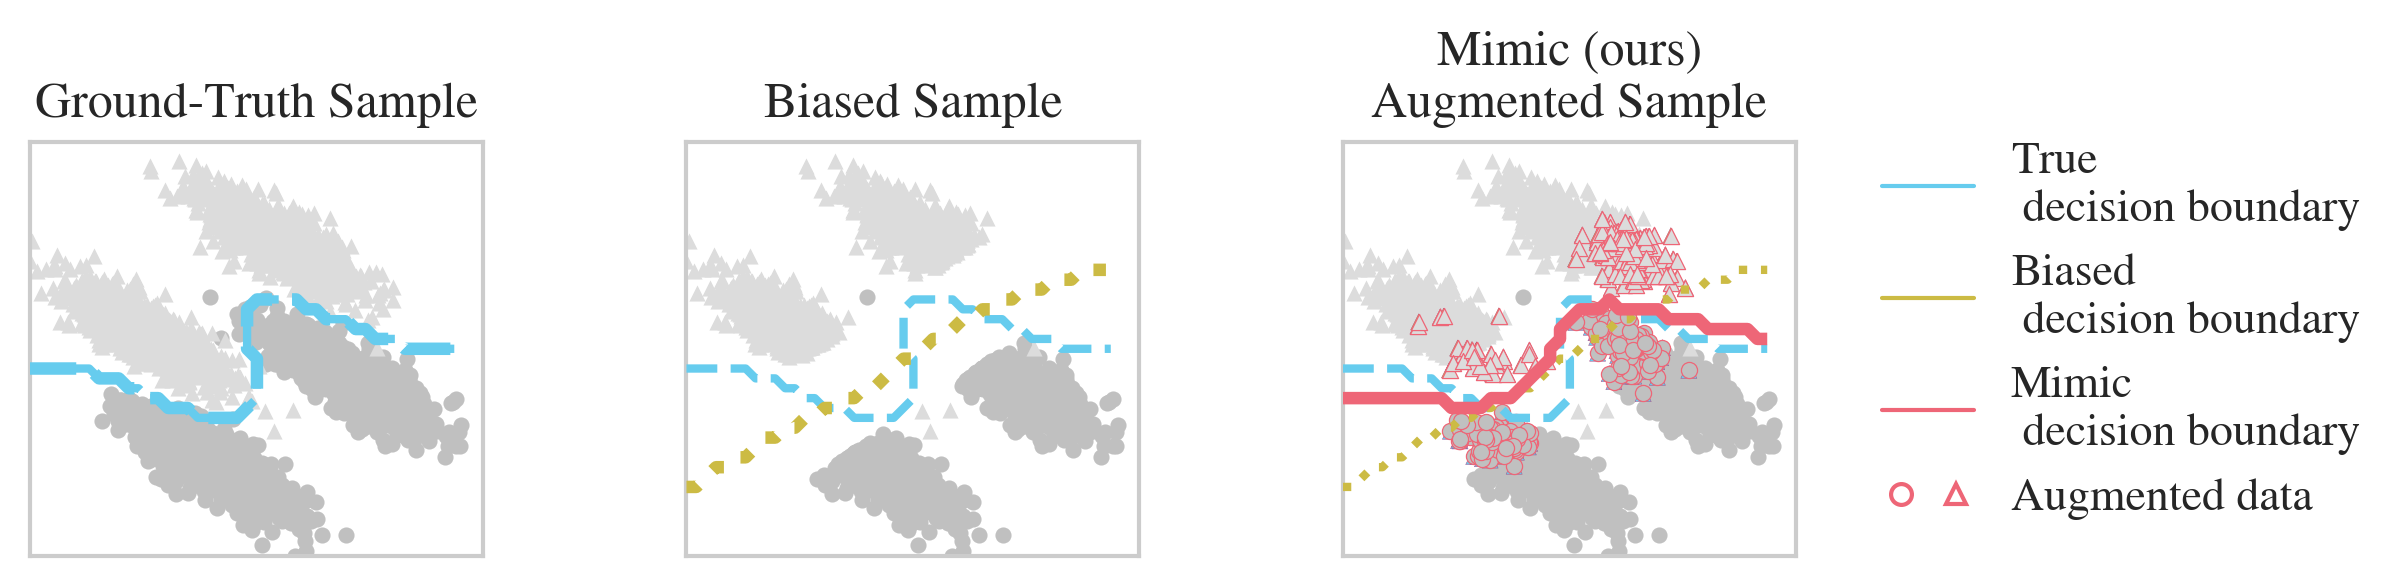

In [140]:
scaler = np.array([1, 1])
fig = plotBoundary(data*scaler, labels%2, data_b*scaler, labels_b%2, data_imi*scaler, (labels_imi%2).astype(int), deleted)

In [141]:
for f in ["svg", "png", 'pdf']:
    fig.savefig("Plots/motivation_decBoundary_crafted."+f, bbox_inches='tight')

# Why GMM does not work

In [2]:
# if we select the number of components via bic
def fit_gmm(data, max_clusters=20, plot=False):
    best_bic = np.Inf
    for c in range(1, max_clusters):
        gm = GaussianMixture(n_components=c, random_state=0).fit(data)
        if gm.bic(data) < best_bic: 
            best_comp = c
            best_bic = gm.bic(data)

    return GaussianMixture(n_components=best_comp, random_state=0).fit(data)

def fit_imi_1D(d):
    num_bins = getBestNumBins(range(min(int(len(d)/2),20), min(60, len(d)-2)), d)
    d_range = (min(d) - 0.5*(max(d)-min(d)), max(d) + 0.5*(max(d)-min(d)))
    grid = [(d_range[0] + i*((d_range[1] - d_range[0]) / num_bins)) for i in range(num_bins+1)]
    mids = grid[:-1] + np.diff(grid)/2
    kde = KDEUnivariate(d)
    kde.fit(bw='silverman', kernel='gau', fft=False)      
    values = np.array([kde.evaluate(i)[0] if kde.evaluate(i) > 0 else 0 for i in mids])
    values_scaled = (len(d) / sum(values)) * values    # scale to absolute values
    SN = scaled_norm()
    _, p = SN.fit(mids, values_scaled, d, returnParams=True) # fit Gaussian   
    return p

In [34]:
data = np.random.normal(0, 3, 5000)
data_b = data[data<1.7]
gm1_params = norm.fit(data_b.reshape(-1, 1))
gm_params = fit_gmm(data_b.reshape(-1, 1), 20)
imi_params = fit_imi_1D(data_b)

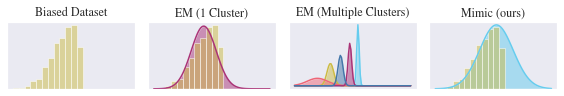

In [59]:
sns.set_theme()
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
bins = 20

fig = plt.figure(figsize=(8, 1.5))
grid = fig.add_gridspec(ncols=4, nrows=1)
gt = fig.add_subplot(grid[0, 0], xticklabels=[], yticklabels=[], xticks=[], yticks=[])
gm1 = fig.add_subplot(grid[0, 1], xticklabels=[], yticklabels=[], xticks=[], yticks=[])
gm = fig.add_subplot(grid[0, 2], xticklabels=[], yticklabels=[], xticks=[], yticks=[])
imi = fig.add_subplot(grid[0, 3], xticklabels=[], yticklabels=[], xticks=[], yticks=[])

gt.set_title('Biased Dataset')
gm1.set_title('EM (1 Cluster)')
gm.set_title('EM (Multiple Clusters)')
imi.set_title('Mimic (ours)')

x = np.linspace(-10, 10, 100)

c_gt = 1
gt.hist(data_b, bins=bins, range=[-10,10], density=True, alpha=0.5, color=colormap[c_gt])

vals = np.zeros(100)
#gm.hist(data_b, bins=bins, range=[-10,10], density=True, alpha=0.5, color=colormap[c_gt])
for i in range(len(gm_params.means_)):
    y = norm(gm_params.means_[i], gm_params.covariances_[i]).pdf(x)[0] / len(gm_params.means_)
    gm.plot(x, y, c=colormap[i])
    gm.fill_between(x, 0, y, alpha=0.5, facecolor=colormap[i])
    
y = norm(imi_params[1], imi_params[2]).pdf(x)*(len(data)/len(data_b))
imi.hist(data_b, bins=bins, range=[-10,10], density=True, alpha=0.5, color=colormap[c_gt])
imi.plot(x, y, c=colormap[0])
imi.fill_between(x, 0, y, alpha=0.5, facecolor=colormap[0])

y = norm(gm1_params[0], gm1_params[1]).pdf(x)#*len(data_b)
c_gm1 = 3
gm1.hist(data_b, bins=bins, range=[-10,10], density=True, alpha=0.5, color=colormap[c_gt])
gm1.plot(x, y, c=colormap[c_gm1])
gm1.fill_between(x, 0, y, alpha=0.5, facecolor=colormap[c_gm1])

plt.tight_layout()
plt.show()

In [57]:
for f in ["svg", "png", "pdf"]:
    fig.savefig("Plots/whyNotGMM."+f, bbox_inches='tight', dpi=300)